## Module Imports

In [1]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading of Dataset

Here we are going to fetch and load in the dataset.

This dataset comes separated in **features** `X` and **targets** `y`. I will join both of them to create a complete DataFrame I can work on.

In [2]:
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 

In [3]:
X.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States


In [4]:
y.head(3)

,income
0,<=50K
1,<=50K
2,<=50K


In [5]:
# build the full DataFrame joining X and y by columns
df = pd.concat([X,y], axis='columns')
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


# EDA (Exploratory Data Analysis)

Firstly I'm going to have a brief overview of

- Which columns are categorical ou numerical

- If there's a significant amount of missing values

- How the numerical features behave 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


This description shows us that `fnlwgt`, `capital-gain` and `capital-loss` columns have an odd distributions of values. While I'm not sure of what the meaning behind the `fnlwgt` values is, the `capital-gain` and `capital-loss` at first sight appear to have most of the values near 0.

Let's separate categorical and numerical columns and check what the values of each look like.

In [8]:
categorical_columns = df.select_dtypes(include="object").columns
numerical_columns = df.select_dtypes(include="number").columns

In [9]:
print(categorical_columns, "\n")
print(numerical_columns, "\n")

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object') 

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object') 



In [10]:
def check_value_counts_in_dataframe(df, columns):
    for col in columns:
        print(df[col].value_counts(), "\n")

In [11]:
check_value_counts_in_dataframe(df, categorical_columns)

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64 

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64 

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64 

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial

As we can see above, there are a few problematic categorical columns.

- The `workclass`, `occupation` and `native-country` columns have `?` as values.

- The `income` column has values with `.`. 

We must clean the data before doing any other sort of analysis.

The `?` symbol would only appear in categorical variables and doesn't seem to have any significant use in any of them, therefore we can replace all appearances of `?` in the DataFrame by `NaN`.

In [12]:
df.replace('?', np.nan, inplace=True)

check_value_counts_in_dataframe(df, ['workclass', 'occupation', 'native-country'])

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64 

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64 

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England     

In [13]:
df['income'] = df['income'].str.replace('.', '', regex=False)
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

The ``native-country`` feature has over 40 countries, most of them having very few people. Since we're going to use One Hot Encoding later, this amount of values is going to create 40+ new columns to our dataset.

Let's turn all values except **"United-States"** into **"Other"**

In [14]:
df.loc[df['native-country'] != "United-States", 'native-country'] = "Other"

In [15]:
df['native-country'].value_counts()

native-country
United-States    43832
Other             5010
Name: count, dtype: int64

## Handling Missing Values

As we've seen above, there are features with missing values, we must decide how to handle them so that the subsequent analysis is reliable.

Let's see, for categorical and numerical columns, which have missing values, what the % of missing values is, and decide what to do based on that.

In [16]:
def check_missing_values_stats(df, columns):
    cols_with_nans = 0
    for col in columns:
        
        num_nans = df[col].isnull().sum()
        total_entries = df[col].shape[0]
        percentage = num_nans / total_entries * 100

        if num_nans > 0:
            print(f"Column '{col}' has {num_nans} NaNs | {num_nans} / {total_entries} - {percentage:.3f} % ")
            cols_with_nans += 1
    
    if cols_with_nans == 0:
        print('No columns provided have missing values.')

In [17]:
check_missing_values_stats(df, categorical_columns)

Column 'workclass' has 2799 NaNs | 2799 / 48842 - 5.731 % 
Column 'occupation' has 2809 NaNs | 2809 / 48842 - 5.751 % 


For the categorical columns there are 2 features with missing values. 
Although the percentage of `NaN` is not really significant, let's take a look at the values of each one so we can make a decision on how to treat them. 

In [18]:
check_value_counts_in_dataframe(df, ['workclass', 'occupation'])

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64 

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64 



The feature `workclass` seems to have highly skewed class distributions and the `occupation` feature has a more balanced class distribution, but given the % of missing values is not significant and the study we are making is not critical, it should be fine to replace missing values with the mode without raising bias concerns.

In [19]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [20]:
check_missing_values_stats(df, categorical_columns)

No columns provided have missing values.


We've handled missing values for **categorical** columns, let's now check the **numerical** columns.

In [21]:
check_missing_values_stats(df, numerical_columns)

No columns provided have missing values.


In [22]:
df_cleaned = df.copy()

## Outlier Identification & Distribution Analysis

In this section I will be analyzing the **numerical** features and identifying if any of them have outliers. For this I'm going to use the **IQR method**.

It is robust to skewed data and helps identify extreme values based on quartiles. The IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1):

$$IQR = Q3 - Q1$$

We then consider outliers values outside these bounds:

$$Lower Bound = Q1 - 1.5 * IQR $$
$$Upper Bound = Q3 + 1.5 * IQR $$


In [23]:
def verify_outliers_with_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    has_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    return has_outliers.any()

In [24]:
for col in numerical_columns:
    col_has_outliers = verify_outliers_with_iqr(df, col)

    if col_has_outliers:
        print(f'Column {col} has outliers')
    else:
        print(f'Column {col} doesnt have outliers')

Column age has outliers
Column fnlwgt has outliers
Column education-num has outliers
Column capital-gain has outliers
Column capital-loss has outliers
Column hours-per-week has outliers


Using the IQR method it seems like all the numerical columns have outliers. Let's plot some visualizations to have a closer look.

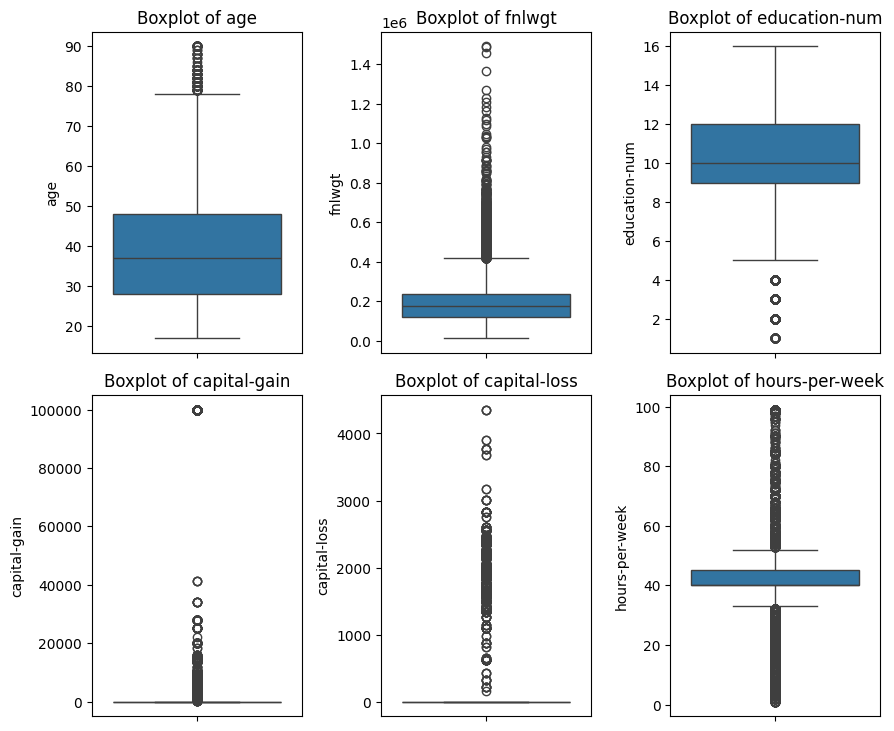

In [25]:
plt.figure(figsize=(9, 11))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, y=col) 
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In this case, boxplots gave us interesting insights about the way the `age`, `education-num` and `hours-per-week` features behave.

- `age` column seems to have outliers when values are $\ge 80$

- `education-num` seems to show the behavior of a feature that is actually a category, checking on the categorical feature `education`, I can see that they have equal values count and are therefore the same data shown in different ways. Since models prefer numbers, I am going to drop the education column in the data preparation step.

- `hours-per-week` shows that the majority of people will work on average around 45 hours a week, anything much lower or much higher than that is considered an outlier.

For the other features, I will try plotting histograms to grasp what the outliers might be.


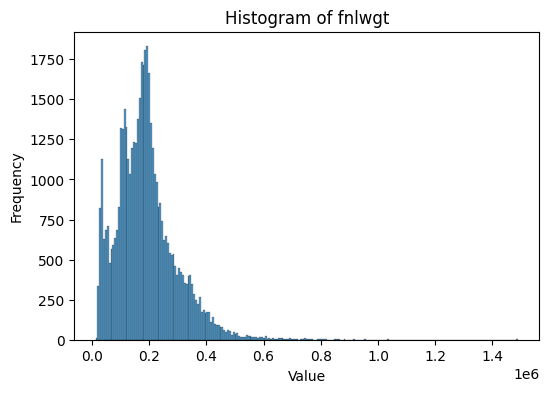

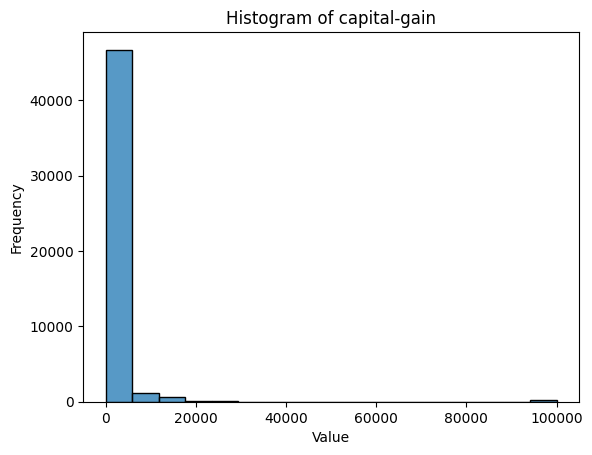

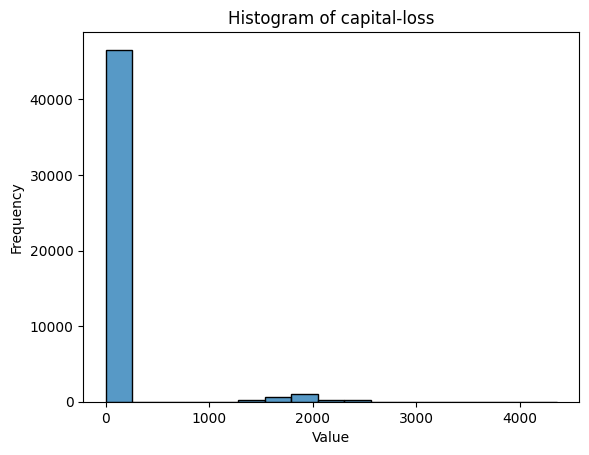

In [26]:
plt.figure(figsize=(6, 4))

numerical_hist_columns = ['fnlwgt', 'capital-gain', 'capital-loss']

for col in numerical_hist_columns:
    sns.histplot(df[col])    
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

Both ``capital-gain`` and ``capital-loss`` seem to have most of the values closer to 0, which explains the quantile distribution we saw at the beginning.

Let's plot ECDFs to both features to see how the distributions behave.

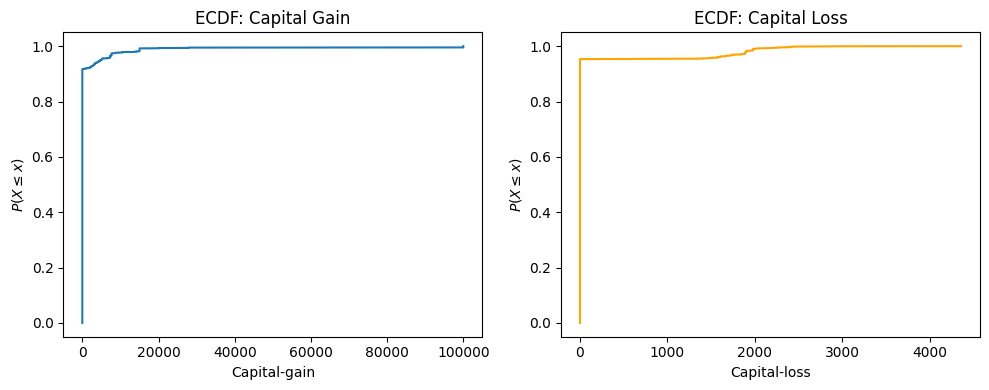

In [27]:
from statsmodels.distributions.empirical_distribution import ECDF

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ecdf_gain = ECDF(df['capital-gain'])

axes[0].plot(ecdf_gain.x, ecdf_gain.y)
axes[0].set_xlabel('Capital-gain')
axes[0].set_ylabel('$P(X \leq x)$')
axes[0].set_title('ECDF: Capital Gain')

ecdf_loss = ECDF(df['capital-loss'])

axes[1].plot(ecdf_loss.x, ecdf_loss.y, color='orange')
axes[1].set_xlabel('Capital-loss')
axes[1].set_ylabel('$P(X \leq x)$')
axes[1].set_title('ECDF: Capital Loss')

plt.tight_layout()
plt.show()

As we can see, both columns are highly skewed and we can conclude that most people have **0** ``capital-gain`` or ``capital-loss``.

## Exploration Of the Target Value

Let's now take a closer look at the target variable.

In [28]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [29]:
df['income'].value_counts() / df['income'].shape[0] * 100

income
<=50K    76.071823
>50K     23.928177
Name: count, dtype: float64

- ~76% of people in this dataset earn <= 50k.
- ~24% of people in this dataset earn > 50k.

Since the split is not 50/50 the dataset is **inbalanced**.

This will be important later when we train our models, because if a model predicts **<=50k** everytime, it will still have a ~76% model accuracy. 

## Visualizations To Support Insights

Let's see what type of correlations the ``income`` feature might have to other features. Let's start by asking some questions.

- Does being older correlate to earning > 50k?
- Does higher education correlate to earning > 50k?
- Being female or male makes a difference in earning > 50k?
- Does marital status correlate to earning > 50k? 

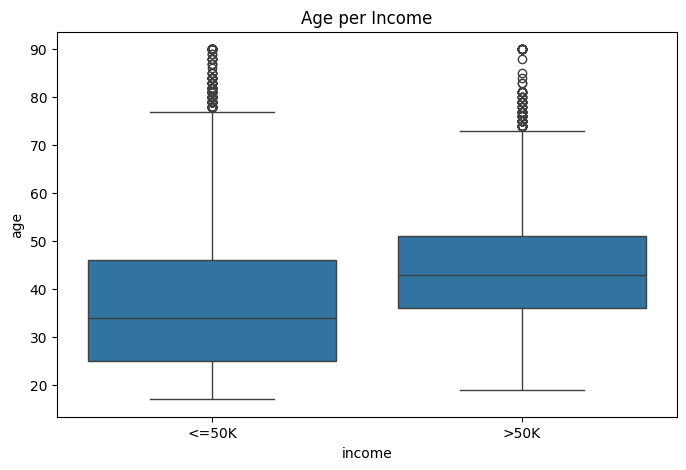

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age per Income')
plt.show()

As the boxplot shows, people who earn >50k, tend to be older.

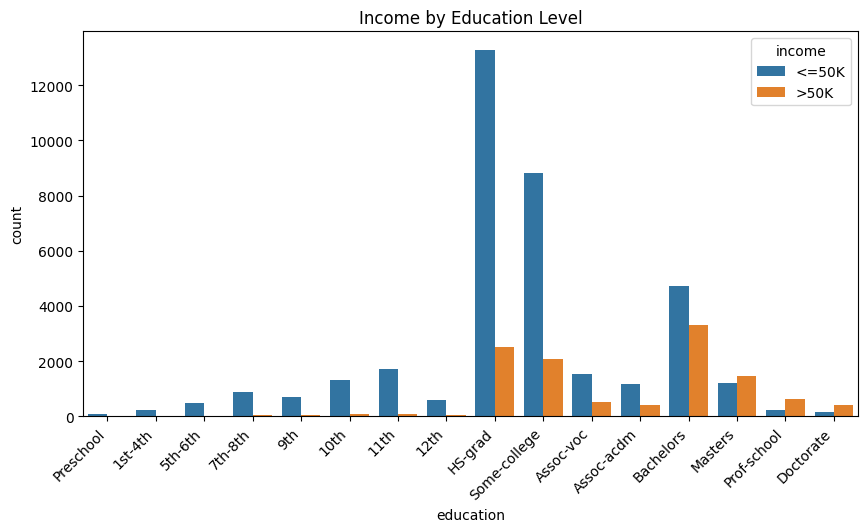

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='education', hue='income', data=df, order=df.sort_values('education-num')['education'].unique())

plt.xticks(rotation=45, ha='right') 
plt.title('Income by Education Level')
plt.show()

People with education above HS-grad start earning >50k.

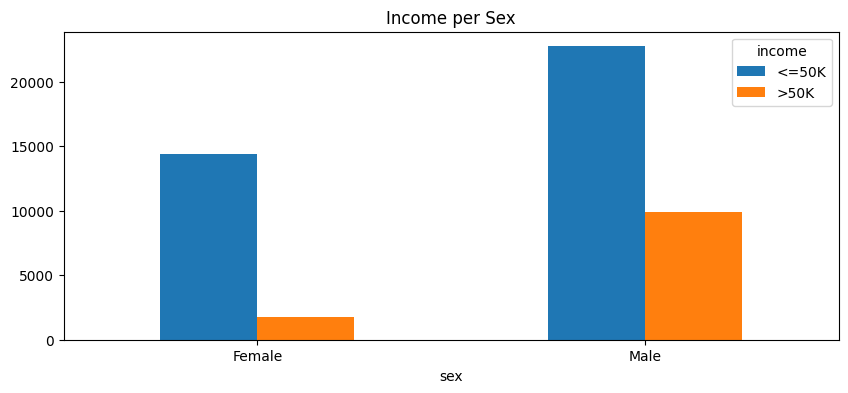

In [32]:
crosstab = pd.crosstab(df['sex'], df['income'])
barplot = crosstab.plot.bar(rot=0, figsize=(10,4), title="Income per Sex")

Men seem to have a bigger chance of winning >50k.

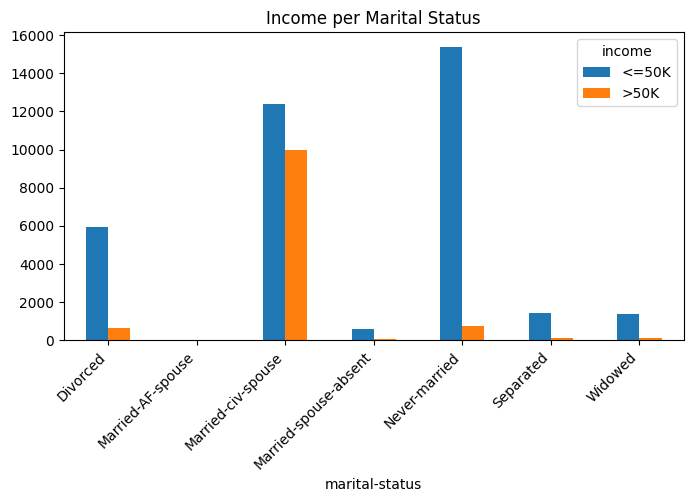

In [33]:
crosstab = pd.crosstab(df['marital-status'], df['income'])
barplot = crosstab.plot.bar(rot=0, title="Income per Marital Status", figsize=(8,4))
plt.xticks(rotation=45, ha='right')
plt.show()

People with `Married-civ-spouse` are more likely to earn >50k.

For all numerical columns, let's plot a heatmap and see if theres features that have more correlation than the others.

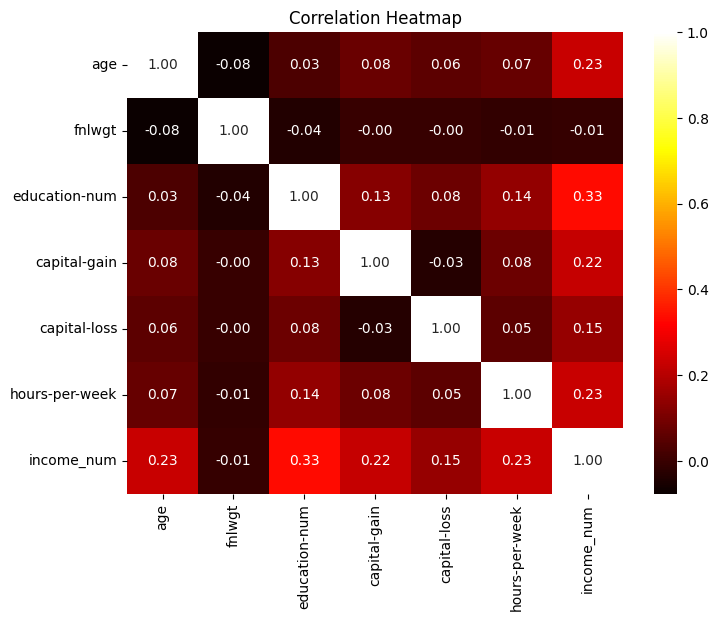

In [34]:
df_corr = df.copy()
df_corr['income_num'] = df_corr['income'].apply(lambda x: 1 if x == '>50K' else 0)

numerical_cols = np.concatenate((numerical_columns, ['income_num'])) # join numerical columns with the new income col
corr_matrix = df_corr[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='hot', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In the heatmap we can see that the numerical feature that has more correlation with `income` is `education-num`, followed by `age` and `hour-per-week`.

We can also see that `fnlwgt` has negative values, which means it can probably be dropped as it's not going to be useful to help predict our target. 

# Data Preparation 

As I've mentioned above, I'm going to start by removing the columns that I found not to be useful to train our models.

In [35]:
df.drop(columns=['fnlwgt', 'education'], inplace=True)

In [36]:
numerical_columns = numerical_columns.drop('fnlwgt')
categorical_columns = categorical_columns.drop('education')

In [37]:
print(['fnlwgt', 'education'] in df.columns.tolist())
print(['fnlwgt'] in numerical_columns.tolist())
print(['education'] in categorical_columns.tolist())

False
False
False


As `income` is our target, let's drop that column from the categorical columns.

In [38]:
categorical_columns = categorical_columns.drop('income')

In [39]:
numerical_columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [40]:
categorical_columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country'],
      dtype='object')

Let's also transform our target variable `income` into numbers so that the model can work with them.

In [41]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [42]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [43]:
df['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

## Train / Test Split

Before encoding and scaling the data it is good practice that we split the data to avoid the model from seeing test answers 

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1) 

y = df['income']

# Split the data - 20% test 80% train | I put in a seed so everytime it runs i get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(f"Training data shape: {X_train.shape}")

Training data shape: (39073, 12)


In [46]:
print(f"Testing data shape: {X_test.shape}")

Testing data shape: (9769, 12)


## Encoding of Categorical Variables & Standardisation of Numerical Variables

With those columns out of the way we can start by encoding the categorical variables. 

Because we removed the `education` and kept `education-num` , all the other categorical features have no order, so to encode them we can use One-Hot-Encoding.

One Hot Encoding is a method for converting categorical variables into a binary format. It creates new columns for each category where 1 means the category is present and 0 means it is not. This prevents models from misinterpreting categories as having an inherent order.

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [48]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

Let's also Standardise our numerical columns since features like `capital-gain` and `capital-loss` have huge numbers and other features have smaller numbers like `age`. This way we can make sure the model doesn't focus on the bigger numbers in detriment of the smaller ones.

In [49]:
scaler = StandardScaler()

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_columns), 
        ('cat', ohe, categorical_columns)      
    ],
    remainder='drop' # Drops any column not listed, like 'education' jic 
)

In [51]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Classifiers

In this section let's work with 3 classifiers:

- Logistic Regression
- Random Forest
- XGBoost (eXtreme Gradient Boosting)

## Logistic Regression

Logistic Regression is a linear classifier.
- It estimates the probability that a given instance belongs to a certain class.
- It uses the sigmoid function to map the output of a linear equation between 0 and 1.
- A threshold (often 0.5) is applied to this probability to classify the outcome.

We will be using this classifier because it is a good baseline, simple, and fast.

In [52]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(
    class_weight='balanced', #using class_weight = 'balanced' to help with the inbalaced target issue
)

logistic_regression.fit(X_train_processed, y_train)

print(f"Logistic Regression Training Accuracy: {logistic_regression.score(X_train_processed, y_train):.4f}")
print(f"Logistic Regression Testing Accuracy:  {logistic_regression.score(X_test_processed, y_test):.4f}")

Logistic Regression Training Accuracy: 0.8067
Logistic Regression Testing Accuracy:  0.8037


## Random Forest

Random Forest is a machine learning model that combines multiple decision trees. Each tree in the forest is trained on a random sample of the data and considers only a random subset of features when making splits (feature randomization).

For classification tasks, the forest predicts by majority voting among trees.

Simplified, random forest makes multiple decision trees and puts them together to get more a more accurate decision.

In [53]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(
    class_weight='balanced', #using class_weight = 'balanced' to help with the inbalaced target issue
    min_samples_leaf= 3 # changed min smaples leaf since model was overfitting 
) 
random_forest.fit(X_train_processed, y_train)

print(f"Random Forest Training Accuracy: {random_forest.score(X_train_processed, y_train):.4f}")
print(f"Random Forest Testing Accuracy:  {random_forest.score(X_test_processed, y_test):.4f}")

Random Forest Training Accuracy: 0.8662
Random Forest Testing Accuracy:  0.8330


## XGBoost

XGBoost uses a technique called gradient boosting. 

It starts by creating a simple decision tree and then adds more trees to the model iteratively, with the focus on fixing the mistakes made by the previous trees.

The process continues until a predetermined number of trees is reacher or until there is no more significant improvement to the model's performance.

In [54]:
import xgboost as xgb

xgboost = xgb.XGBClassifier()

xgboost.fit(X_train_processed, y_train, eval_set=[(X_test_processed, y_test)])

print(f"XGBoost Training Accuracy: {xgboost.score(X_train_processed, y_train):.4f}")
print(f"XGBoost Testing Accuracy:  {xgboost.score(X_test_processed, y_test):.4f}")

[0]	validation_0-logloss:0.44282
[1]	validation_0-logloss:0.39410
[2]	validation_0-logloss:0.36521
[3]	validation_0-logloss:0.34554
[4]	validation_0-logloss:0.33257
[5]	validation_0-logloss:0.32410
[6]	validation_0-logloss:0.31761
[7]	validation_0-logloss:0.31269
[8]	validation_0-logloss:0.30978
[9]	validation_0-logloss:0.30730
[10]	validation_0-logloss:0.30469
[11]	validation_0-logloss:0.30187
[12]	validation_0-logloss:0.29869
[13]	validation_0-logloss:0.29725
[14]	validation_0-logloss:0.29606
[15]	validation_0-logloss:0.29420
[16]	validation_0-logloss:0.29330
[17]	validation_0-logloss:0.29070
[18]	validation_0-logloss:0.28995
[19]	validation_0-logloss:0.28869
[20]	validation_0-logloss:0.28816
[21]	validation_0-logloss:0.28723
[22]	validation_0-logloss:0.28732
[23]	validation_0-logloss:0.28630
[24]	validation_0-logloss:0.28611
[25]	validation_0-logloss:0.28535
[26]	validation_0-logloss:0.28510
[27]	validation_0-logloss:0.28476
[28]	validation_0-logloss:0.28431
[29]	validation_0-loglos

# Classification Metrics

In this section we will explore different classification metrics for our models.

In the section above we used **Accuracy** to verify how well our model behaves. That result is obtained by taking the ratio of observations predicted correctly to total observations. But as explained further above, a lazy model that predicts <=50k every single time is still going to have a 76% accuracy which makes the model ultimately useless. This is why accuracy can be misleading for imbalanced data. 

Another metric we can use is a **Confusion Matrix**. A Confusion Matrix is a table that breaks down predictions in four categories:

- True Positive (TP): Predicted >50K, Actually >50K
- True Negative (TN): Predicted <=50K, Actually <=50K
- False Positive (FP): Predicted >50K, Actually <=50K
- False Negative (FN): Predicted <=50K, Actually >50K

We're also going to explore some other classification metrics:

- **Precision**
    - Helps us with finding out of all predicted positives, how many were correct (Minimize false positives)
- **Recall**
    - Helps us with finding out of all actual positives, how many we found (Minimize false negatives).
- **F1 Score**
    - The harmonic mean of Precision and Recall. 
    - It provides a single score that balances both concerns.


--- Logistic Regression Report ---
              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      7414
        >50K       0.56      0.84      0.67      2355

    accuracy                           0.80      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.80      0.81      9769

--- Random Forest Report ---
              precision    recall  f1-score   support

       <=50K       0.94      0.83      0.88      7414
        >50K       0.61      0.82      0.70      2355

    accuracy                           0.83      9769
   macro avg       0.77      0.83      0.79      9769
weighted avg       0.86      0.83      0.84      9769

--- XGBoost Report ---
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      7414
        >50K       0.78      0.65      0.71      2355

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.

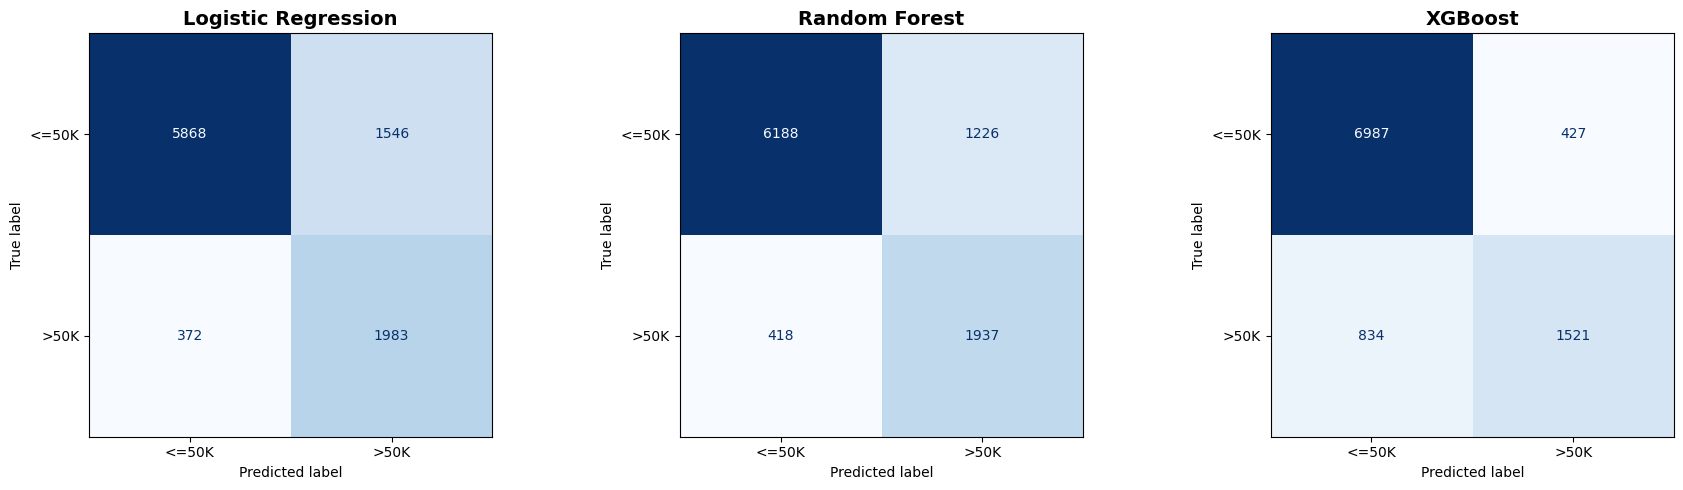

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = {
    'Logistic Regression': logistic_regression,
    'Random Forest' : random_forest,
    'XGBoost' : xgboost 
}

for i, (name, model) in enumerate(models.items()):

    classifier = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
            ]
        )
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
    cm_display.plot(ax=axes[i], cmap='Blues', values_format='d', colorbar=False)
    
    axes[i].set_title(f"{name}", fontsize=14, fontweight='bold')
    axes[i].grid(False)

    print(f"--- {name} Report ---")
    print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

plt.tight_layout()
plt.show()

We can conclude that:

- Logistic Regression
    - Predicts high earners a lot more times than the others
    - Has high recall (identifies 84% of actual high earners)
    - Has a very low precision, which means it has too many false positives
- Random Forest
    - Also has a high Recall (identifies 82% of actual high earners)
    - Has a slighly better precision (38% of people flagged as high earners actually earn <=50k)
- XGBoost
    - Very good precision (78%), rarely makes a mistake when predicting high earners
    - Lowest recall, it's too conservative about classifying high earners








# Statistical Tests

## Question 1

In this question I need to investigate whether the proportion of women earning more than 50K is equal to the proportion of men earning more than 50K.

Here are our hypothesis:

${H_0}$ : The proportion of women that win $>50K$ is the same as men's 

${H_1}$ : The proportion of women that win $>50K$ is not the same as men's 

In this case, our statistic will be the difference between women proportions and men proportions $statistic = \hat{p}_{women} - \hat{p}_{men}$

$$H_0 : \hat{p}_{women} - \hat{p}_{men} = 0$$

$$H_1 : \hat{p}_{women} - \hat{p}_{men} \neq 0$$

If the proportions are the same, the label 'Female' and 'Male' makes absolutely no difference. So it shouldn't be a problem if we keep the income column and shuffle the values in the sex column as the proportions obtained will be the exact same.

In [56]:
def compute_difference(df):

    men_mask = (df['sex'] == 'Male')
    p_men = df[men_mask]['income'].eq('>50K').mean()
    
    women_mask = (df['sex'] == 'Female')
    p_women = df[women_mask]['income'].eq('>50K').mean()
    
    return p_women - p_men

observed_difference = compute_difference(df_cleaned)
print('Observed Difference:', observed_difference)

Observed Difference: -0.19451574596420296


Based of this observed difference it is likely that the null hypothesis is going to be rejected but let's run the simulation.

In [57]:
n_simulations = 1000
simulated_differences = []

simulation_df = df_cleaned.copy()

for x in range(n_simulations):
    
    simulation_df['sex'] = np.random.permutation(simulation_df['sex'].values)
    
    simulated_difference = compute_difference(simulation_df)
    simulated_differences.append(simulated_difference)

In [58]:
p_value = np.mean(np.abs(simulated_differences) >= np.abs(observed_difference))

print(f"P-value: {p_value:.3f}")

P-value: 0.000


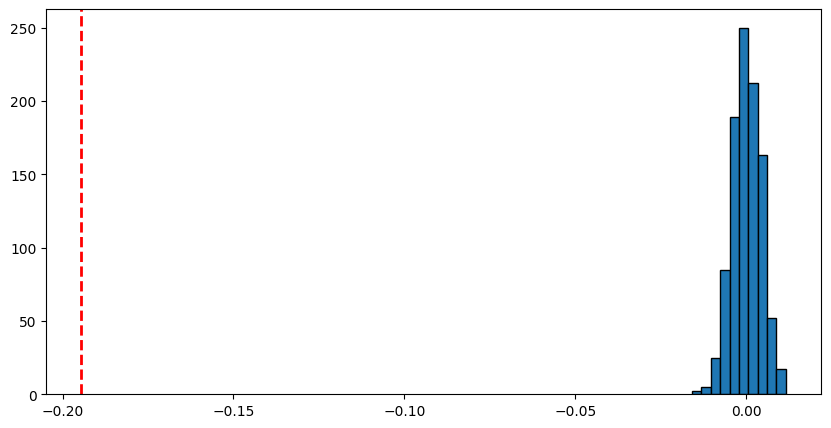

In [59]:
plt.figure(figsize=(10, 5))
plt.hist(simulated_differences, bins=10, edgecolor='black')
plt.axvline(observed_difference, color='red', linestyle='dashed', linewidth=2)

The p_value < 0.05 we reject the Null Hypothesis.
There is strong statistical evidence that the proportion of women earning >50k is significantly different from men.

## Question 2


Given 2 groups:
- Group A - individuals working $>40$ hours per week
- Group B -  individuals working $\leq 40$ hours per week

In this question I will investigate whether the proportion of individuals earning >50K differs between Group A and Group B.


The hypothesis I identified for this problem are:

$H_0$: The proportions of individuals earning >50K is equal for Group A and Group B $\to p_a - p_b = 0$

$H_1$ : The proportions of individuals earning >50K differs between Group A and Group B $\to p_a - p_b \neq 0$

For this problem I will need to create a new column for the different groups:

In [60]:
df_q2 = df_cleaned.copy()

df_q2['group'] = np.where(df_q2['hours-per-week'] > 40, 'A', 'B')

In [61]:
df_q2[['group']]

,group
0,B
1,B
2,B
3,B
4,B
...,...
48837,B
48838,B
48839,A
48840,B


In [62]:
def compute_difference(df):

    GA_mask = (df['group'] == 'A')
    p_GA = df[GA_mask]['income'].eq('>50K').mean()
    
    GB_mask = (df['group'] == 'B')
    p_GB = df[GB_mask]['income'].eq('>50K').mean()
    
    return p_GA - p_GB

observed_difference = compute_difference(df_q2)
print('Observed Difference:', observed_difference)

Observed Difference: 0.22771480948866957


By this observed difference we can guess that Group A earns more than Group B. Let's run the simulations.

In [63]:
n_simulations = 1000
simulated_differences = []

simulation_df = df_q2.copy()

for x in range(n_simulations):
    
    simulation_df['group'] = np.random.permutation(simulation_df['group'].values)
    
    simulated_difference = compute_difference(simulation_df)
    simulated_differences.append(simulated_difference)

In [64]:
p_value = np.mean(np.abs(simulated_differences) >= np.abs(observed_difference))

print(f"P-value: {p_value:.3f}")

P-value: 0.000


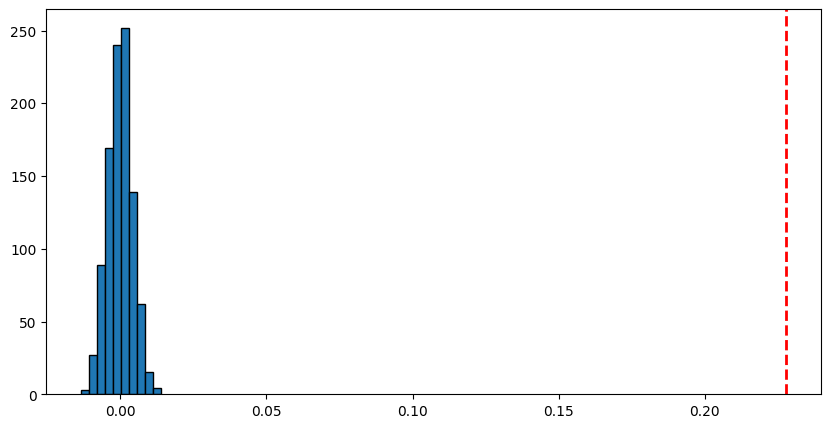

In [65]:
plt.figure(figsize=(10, 5))
plt.hist(simulated_differences, bins=10, edgecolor='black')
plt.axvline(observed_difference, color='red', linestyle='dashed', linewidth=2)

The p_value < 0.05 we reject the Null Hypothesis.

There is strong statistical evidence that the proportion of individuals earning >50K differs between Group A and Group B